# Linear regression

Import all the modules you will need in this notebook here:

In [64]:
#exercise 0
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [65]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
fram = pd.read_csv("fram.txt", sep="\t")
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2 $\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [66]:
# exercise 2
# Put your solution here!
def rescale(input: pd.Series) -> pd.Series:
    return (input-input.mean())/(input.std()*2)


Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [67]:
# exercise 3
# Put your solution here!

# made into a dict first for efficiency
for column in fram:
    if (fram[column].dtype == float) or (fram[column].dtype == int):
        fram[f"s{column}"] = rescale(fram[column])

fram

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,...,sAGE,sFRW,sSBP,sSBP10,sDBP,sCHOL,sCIG,sCHD,sDEATH,sYRS_DTH
0,4988,female,57,135,186,NaN,120,150,0,1,...,0.477764,0.834668,0.676501,NaN,1.049625,-0.914016,-0.346569,-0.035923,0.827181,-0.665514
1,3001,female,60,123,165,NaN,100,167,25,0,...,0.791473,0.496687,0.301796,NaN,0.346698,-0.730446,0.732493,-0.227056,1.295472,0.099516
2,5079,female,54,115,140,NaN,90,213,5,0,...,0.164056,0.271367,-0.144281,NaN,-0.004765,-0.233727,-0.130757,-0.227056,0.983278,-0.410504
3,5162,female,52,102,170,NaN,104,280,15,0,...,-0.045083,-0.094779,0.391012,NaN,0.487283,0.489755,0.300868,-0.227056,0.827181,-0.665514
4,4672,female,45,99,185,NaN,105,326,20,0,...,-0.777070,-0.179274,0.658658,NaN,0.522430,0.986475,0.516680,-0.227056,1.295472,0.099516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,4132,male,51,100,160,NaN,98,216,30,0,...,-0.149653,-0.151109,0.212581,NaN,0.276405,-0.201332,0.948305,-0.227056,0.827181,-0.665514
1390,5418,male,50,95,174,NaN,106,192,5,0,...,-0.254223,-0.291935,0.462384,NaN,0.557576,-0.460490,-0.130757,-0.227056,0.983278,-0.410504
1391,6260,male,57,88,144,NaN,96,184,20,0,...,0.477764,-0.489090,-0.072908,NaN,0.206113,-0.546876,0.516680,-0.227056,0.202792,-1.685555
1392,5786,male,62,87,156,NaN,90,255,0,0,...,1.000612,-0.517255,0.141209,NaN,-0.004765,0.219799,-0.346569,-0.227056,0.514986,-1.175534


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [68]:
# exercise 4
# Put your solution here!
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.13e-40
Time:                        16:40:44   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [69]:
# exercise 5
# Put your solution here!

fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.44e-46
Time:                        16:40:44   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

The inclusion of age is quite important to the model, since it has the second highest absolute value for the coefficient, with 8.1332 (ignoring the intercept). The variables, ranked in order of most to least importance, are sFRW, sAGE, SEX, and sCHOL.

***

Try to add to the model all the interactions with other variables. 

In [70]:
# exercise 6
# Put your solution here!

fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.92e-43
Time:                        16:40:44   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

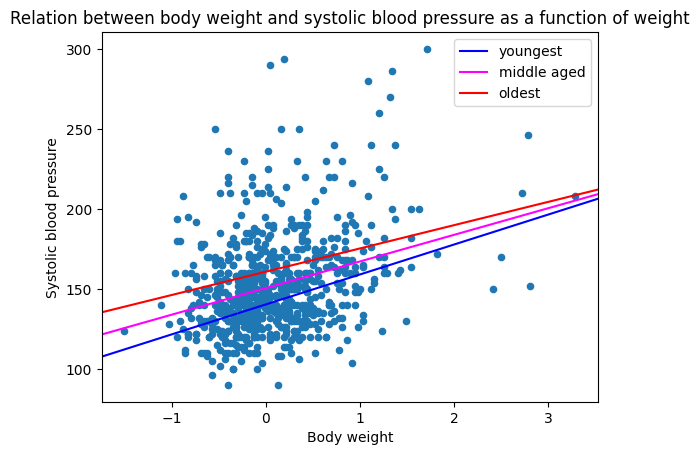

In [71]:
# exercise 7
# Put your solution here!

p = fit.params
fram[fram.SEX=="female"].plot.scatter("sFRW","SBP")
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"], ax=plt.gca(), color="blue", label="youngest")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="magenta",label="middle aged")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"], ax=plt.gca(), color="red", label="oldest")
plt.title("Relation between body weight and systolic blood pressure as a function of weight")
plt.xlabel("Body weight")
plt.ylabel("Systolic blood pressure")
plt.legend()


How does the dependence of blood pressure on weight change as a person gets older?
***

As a person gets older, weight is less important when it comes to determining blood pressure (specifically systolic blood pressure in the graph produced). There is a higher baseline (intercept), and the slope is reduced.
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

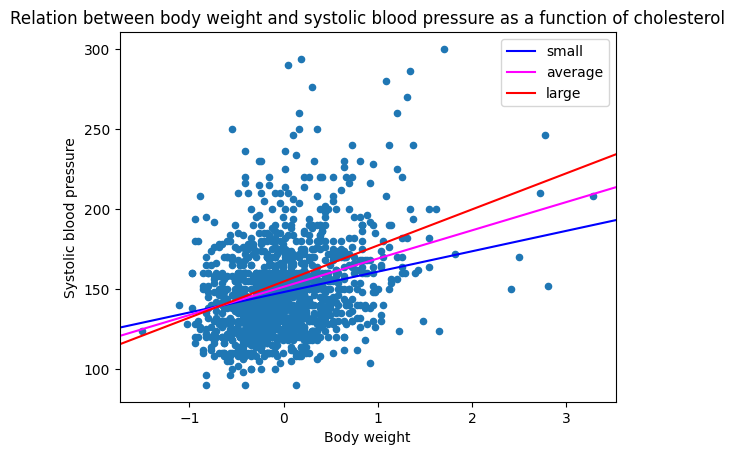

In [72]:
# exercise 8
# Put your solution here!

fit = smf.ols("SBP ~ SEX + sFRW + sCHOL + sAGE + sCIG + SEX:sFRW + SEX:sCHOL + SEX:sAGE + SEX:sCIG + sFRW:sCHOL + sFRW:sAGE + sCHOL:sAGE + sFRW:sCIG + sCHOL:sCIG + sAGE:sCIG", data=fram).fit()
p = fit.params


fram.plot.scatter("sFRW","SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p[f"sFRW:sCHOL"], ax=plt.gca(), color="blue", label="small")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="magenta", label="average")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p[f"sFRW:sCHOL"], ax=plt.gca(), color="red", label="large")
plt.legend()

plt.title("Relation between body weight and systolic blood pressure as a function of cholesterol")
plt.xlabel("Body weight")
plt.ylabel("Systolic blood pressure")

p = fit.params


How does the model and its accuracy look?

***

The model says that with higher cholesterol, the relationship between body weight and systolic blood pressure has a positive gradient. With small levels of cholesterol, the relationship has a negative gradient. 

The acurracy of this model is not great, since the $R^2$ value is rather low at 0.152
***

# Logistic regression

In [73]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [74]:
# exercise 9
# Put your solution here!

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >=90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, family=sm.families.Binomial()).fit()
# print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
                          ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)

0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [75]:
# exercise 10
# Put your solution here!

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sFRW:sAGE + SEX:sAGE", data=fram, family=sm.families.Binomial()).fit()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
                          ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate)

0.3278335724533716


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

Text(0.5, 1.0, 'Male')

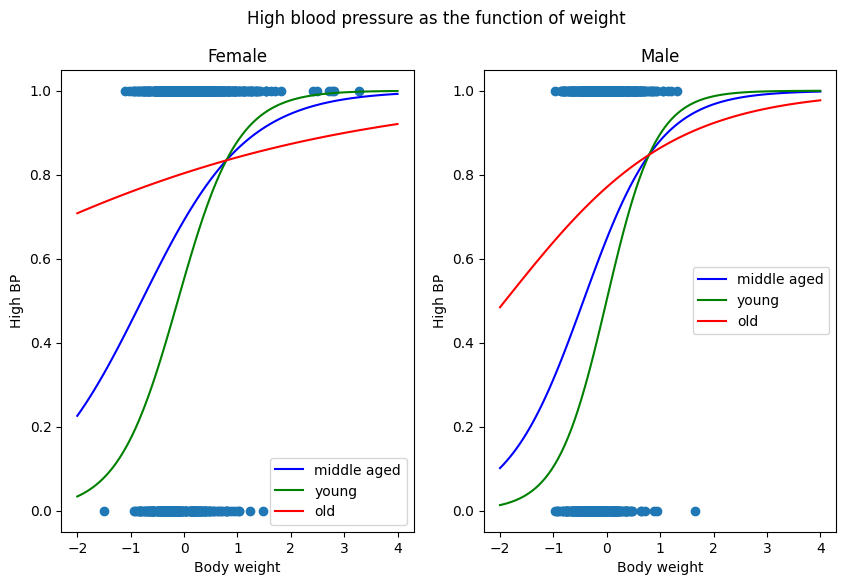

In [76]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + SEX:sAGE",
               data=fram, family=sm.families.Binomial()).fit()
p = fit.params
X = np.linspace(-2,4,100)
fig, ax = plt.subplots(1,2, subplot_kw={"xlabel":"Body weight","ylabel":"High BP"},figsize=(10,6))
plt.suptitle("High blood pressure as the function of weight")
ax[0].scatter(fram.sFRW[fram.SEX=="female"],fram.HIGH_BP[fram.SEX=="female"])
ax[0].plot(X,logistic(X*p.sFRW + p.Intercept),color="blue", label="middle aged")
ax[0].plot(X,logistic(X*(p.sFRW - p[f"sFRW:sAGE"]) + p.Intercept - p["sAGE"]),color="green", label="young")
ax[0].plot(X,logistic(X*(p.sFRW + p[f"sFRW:sAGE"]) + p.Intercept + p["sAGE"]),color="red", label="old")
ax[0].legend()
ax[0].set_title("Female")


ax[1].scatter(fram.sFRW[fram.SEX=="male"],fram.HIGH_BP[fram.SEX=="male"])
ax[1].plot(X,logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) + p["SEX[T.male]"] + p.Intercept),color="blue", label="middle aged")
ax[1].plot(X,logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] - p[f"sFRW:sAGE"]) + p["SEX[T.male]"] + p.Intercept - p["sAGE"]),color="green", label="young")
ax[1].plot(X,logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p[f"sFRW:sAGE"]) + p["SEX[T.male]"] + p.Intercept + p["sAGE"]),color="red", label="old")
ax[1].legend()
ax[1].set_title("Male")

How do the models with different ages and genders differ from each other?

***
For women, age greatly flattens out the curve between high BP and body weight, to the point where it is almost straight line for old women. This effect also happens for men, but it is less pronounced. Additionally, men have steeper curves for all ages compared to women.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [77]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    train = df.sample(frac=train_fraction)
    test = df.sample(frac=(1-train_fraction))
    return train, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [78]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error = []
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + SEX:sAGE",
               data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | 
                         ((pred > 0.5) & (test.HIGH_BP==0)))
    error.append(error_rate)
print(pd.Series(error).mean())

    

0.32913978494623664


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [79]:
# exercise 14
# Put your solution here!
fram["hasCHD"] = fram["CHD"] > 0
fram.hasCHD = fram.hasCHD.map(int)
print(fram.hasCHD.mean())

0.22022955523672882


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [80]:
# exercise 15
# Put your solution here!

fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW",
        data=fram, family=sm.families.Binomial()).fit()

error_rate = 1-np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | 
                          ((fit.fittedvalues > 0.5) & ~fram.hasCHD))

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Thu, 31 Jul 2025   Deviance:                       1442.4
Time:                        16:40:52   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.000      -1.421      -1.157
sCHOL          0.3324      0.130      2.554      0.011       0.077       0.587
sCIG           0.4613      0.126      3.666      0.000       0.215       0.708
sFRW           0.4404      0.130      3.386      0.001       0.185       0.695
sCHOL:sCIG    -0.1022      0.273     -0.374      0.708      -0.637       0.433
sCHOL:sFRW     0.1359      0.239      0.568      0.570      -0.333       0.604
sCIG:sFRW      0.1646      0.258      0.637      0.524      -0.342       0.671
==============================================================================
"""

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

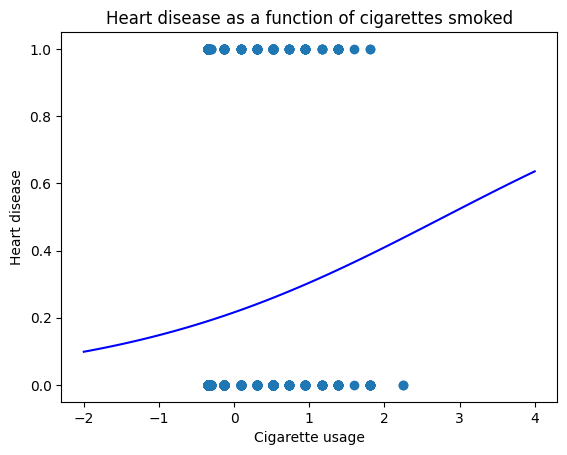

In [83]:
import matplotlib.pyplot as plt
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

# most important factor is sCIG with a slope of approximately -0.4613

p = fit.params
X = np.linspace(-2,4,100)

plt.scatter(fram.sCIG,fram.hasCHD)
plt.plot(X,logistic(X*p.sCIG + p.Intercept), color="blue")
plt.xlabel("Cigarette usage")
plt.ylabel("Heart disease")
plt.title("Heart disease as a function of cigarettes smoked")
plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [82]:
# exercise 17
# Put your solution here!
def converted(value, input_series):
    mean = input_series.mean()
    stdev = input_series.std()*2
    return (value-mean)/stdev

point = {"sCHOL": converted(200, fram["CHOL"]),
         "sCIG": converted(17, fram["CIG"]),
         "sFRW": converted(100, fram["FRW"])}
predicted = fit.predict(point)
predicted

0    0.216162
dtype: float64